### Busca de vídeo com base em conteudo visual

Lendo um vídeo em opencv

In [1]:
from os import listdir, makedirs
from os.path import isfile, join
import os.path as path
import sys
import pickle

import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
frames_dir = 'dataset/frames/'
feature_dir = 'dataset/features/'
cluster_dir = 'dataset/clusters/'
bow_dir = 'dataset/bow/'

if not path.exists(frames_dir):
    makedirs(frames_dir)

if not path.exists(feature_dir):
    makedirs(feature_dir)

if not path.exists(cluster_dir):
    makedirs(cluster_dir)

if not path.exists(bow_dir):
    makedirs(bow_dir)

In [3]:
video_dir = 'dataset/'
video = 'dataset/video.mp4'

cap = cv2.VideoCapture(video)

video_frame = 30
id_frame = 0

ret = True

while ret:
    ret, frame = cap.read()

    length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    if (id_frame % video_frame) == 0 and ret:
        print('Processing frame ' + str(id_frame) + str(length))

        frame_path = path.join(frames_dir, str(id_frame) + '.png')
        cv2.imwrite(frame_path, frame)

    id_frame += 1

print('Done')

Processing frame 06308
Processing frame 306308
Processing frame 606308
Processing frame 906308
Processing frame 1206308
Processing frame 1506308
Processing frame 1806308
Processing frame 2106308
Processing frame 2406308
Processing frame 2706308
Processing frame 3006308
Processing frame 3306308
Processing frame 3606308
Processing frame 3906308
Processing frame 4206308
Processing frame 4506308
Processing frame 4806308
Processing frame 5106308
Processing frame 5406308
Processing frame 5706308
Processing frame 6006308
Processing frame 6306308
Processing frame 6606308
Processing frame 6906308
Processing frame 7206308
Processing frame 7506308
Processing frame 7806308
Processing frame 8106308
Processing frame 8406308
Processing frame 8706308
Processing frame 9006308
Processing frame 9306308
Processing frame 9606308
Processing frame 9906308
Processing frame 10206308
Processing frame 10506308
Processing frame 10806308
Processing frame 11106308
Processing frame 11406308
Processing frame 11706308

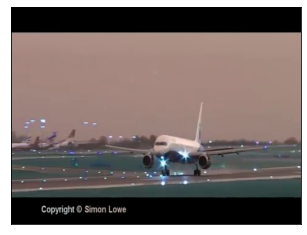

In [4]:
frame = cv2.imread('dataset/frames/150.png')

# cv2.imshow('', frame)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.imshow(frame)
plt.xticks([]); plt.yticks([])
plt.show()

Extraindo os descritorios dos frames do vídeo usuando o BRIEF Descriptor

In [5]:
only_files = []

if path.exists(frames_dir):
    only_files = [f for f in listdir(frames_dir) if isfile(join(frames_dir, f))]

In [6]:
for file in only_files:

    img_path = join(frames_dir, file)

    img = cv2.imread(img_path)

    # opicional: Redimenciona a imagem
    # img = cv2.resize(img, (160, 160), interpolation=cv2.INTER_CUBIC)

    # Inicializa o detector de feature STAR
    star = cv2.xfeatures2d.StarDetector_create()

    # Inicializa o extrator BRIEF 
    brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

    # Encontra os pontos chaves com STAR
    kp = star.detect(img, None)

    # computa os descritores com BRIEF
    kp, feat = brief.compute(img, kp)

    print(len(kp))
    print(np.shape(feat))

    feat_path = join(feature_dir, file)
    with open(feat_path + '.brief', 'wb') as f:
        pickle.dump(feat.tolist(), f)

26
(26, 32)
82
(82, 32)
76
(76, 32)
112
(112, 32)
63
(63, 32)
46
(46, 32)
33
(33, 32)
38
(38, 32)
29
(29, 32)
16
(16, 32)
13
(13, 32)
7
(7, 32)
8
(8, 32)
1
(1, 32)
66
(66, 32)
66
(66, 32)
75
(75, 32)
88
(88, 32)
39
(39, 32)
147
(147, 32)
113
(113, 32)
105
(105, 32)
130
(130, 32)
74
(74, 32)
57
(57, 32)
82
(82, 32)
46
(46, 32)
73
(73, 32)
63
(63, 32)
58
(58, 32)
63
(63, 32)
46
(46, 32)
45
(45, 32)
42
(42, 32)
48
(48, 32)
59
(59, 32)
48
(48, 32)
36
(36, 32)
30
(30, 32)
20
(20, 32)
67
(67, 32)
23
(23, 32)
44
(44, 32)
76
(76, 32)
90
(90, 32)
85
(85, 32)
81
(81, 32)
86
(86, 32)
99
(99, 32)
87
(87, 32)
62
(62, 32)
75
(75, 32)
61
(61, 32)
50
(50, 32)
32
(32, 32)
23
(23, 32)
23
(23, 32)
57
(57, 32)
57
(57, 32)
60
(60, 32)
71
(71, 32)
62
(62, 32)
67
(67, 32)
87
(87, 32)
75
(75, 32)
48
(48, 32)
46
(46, 32)
23
(23, 32)
39
(39, 32)
34
(34, 32)
40
(40, 32)
34
(34, 32)
64
(64, 32)
25
(25, 32)
56
(56, 32)
75
(75, 32)
60
(60, 32)
61
(61, 32)
64
(64, 32)
50
(50, 32)
66
(66, 32)
54
(54, 32)
45
(45, 32)


### Criação do vocabulário visual

1. Clusterização

In [7]:
from sklearn.cluster import KMeans
import time

In [8]:
cluster_file = cluster_dir + "cluster.cluster"

In [9]:
k = 64
dim = 32

In [10]:
def saveCentroids(kmens: KMeans, output_file, dim):
    i = 0
    desc = ''

    for k in np.nditer(kmens.cluster_centers_):
        a = np.array(k).round(2)
        desc += str(a) + ' '
        i += 1

        if i %  dim == 0:
            desc += '\n'

    output_file.write(desc)

In [11]:
listOffeat = []

only_files = []
if path.exists(feature_dir):
    only_files = [f for f in listdir(feature_dir) if isfile(join(feature_dir, f))]

In [12]:
for file in only_files:
    feat_path = join(feature_dir, file)

    with open(feat_path, 'rb') as f:
        feat = pickle.load(f)

    for item in feat:
        listOffeat.append(item)

output_file = open(cluster_file, 'w')
print(np.array(listOffeat).shape)

t1 = time.time()
kmeans = KMeans(n_clusters=k, random_state=0).fit(np.array(listOffeat))
t2 = time.time()
tf = t2 - t1
print(tf)

(12483, 32)
12.580700635910034


In [13]:
saveCentroids(kmeans, output_file, dim)
output_file.close()

### Bag of Visual Word

In [14]:
centroids: np.ndarray = np.loadtxt(cluster_file)

clusters = centroids.shape[0]

In [15]:
only_files = []
if path.exists(feature_dir):
    only_files = [f for f in listdir(feature_dir) if isfile(join(feature_dir, f))]

bagOfImages = []

In [16]:
%%time
# processa cada arquivo de imagem de um diretorio
for file in only_files:
    feat_path = join(feature_dir, file)

    with open(feat_path, 'rb') as f:
        # Lê o dada como um stream binario
        feat = pickle.load(f)

    # inicializa o BoW da imagem com zeros para cada dimensão
    bow = [0] * clusters
    
    # procedimento de força bruta para calculo de distancia (distancia euclidiana)

    for item in feat:
        result = sys.float_info.max
        centroid_id = 0

        for id, c in enumerate(centroids):
            #  distancia euclidiana
            dist = np.sqrt(np.sum(np.square(np.subtract(item, c))))
            if dist < result:
                 result = dist
                 centroid_id = id

        bow[centroid_id] += 1

    bow_path = join(bow_dir, file)

    with open(bow_path + '.bow', 'w') as f:
        for item in bow:
            f.write('%s ' % item)

print('Done')

Done
Wall time: 29.1 s


### Busca

Utilizando um arquivo de BoW de uma imgem do proprio vídeo

In [17]:
q = np.loadtxt(bow_dir + '3870.png.brief.bow')

only_files = []
if path.exists(bow_dir):
    only_files = [f for f in listdir(bow_dir) if isfile(join(bow_dir, f))]

In [18]:
similarity = []

for file in only_files:
    feat_path = join(bow_dir, file)
    item = np.loadtxt(feat_path)

    dist = np.sqrt(np.sum(np.square(np.subtract(item, q))))
    similarity.append(dict(file=file, dist=dist))

In [19]:
import operator
f = operator.itemgetter('dist')

similarity.sort(key=f)
similarity

[{'file': '3870.png.brief.bow', 'dist': 0.0},
 {'file': '5910.png.brief.bow', 'dist': 33.36165463522455},
 {'file': '2160.png.brief.bow', 'dist': 33.66006535941367},
 {'file': '2310.png.brief.bow', 'dist': 33.67491648096547},
 {'file': '3900.png.brief.bow', 'dist': 33.689761055846034},
 {'file': '2280.png.brief.bow', 'dist': 34.0147027033899},
 {'file': '1050.png.brief.bow', 'dist': 34.044089061098404},
 {'file': '3840.png.brief.bow', 'dist': 34.26368339802363},
 {'file': '2250.png.brief.bow', 'dist': 34.698703145794944},
 {'file': '3810.png.brief.bow', 'dist': 34.72751070837067},
 {'file': '1080.png.brief.bow', 'dist': 34.77067730142742},
 {'file': '3990.png.brief.bow', 'dist': 34.85685011586675},
 {'file': '3390.png.brief.bow', 'dist': 34.97141690009142},
 {'file': '2970.png.brief.bow', 'dist': 35.369478367654786},
 {'file': '2190.png.brief.bow', 'dist': 35.679125549822544},
 {'file': '1470.png.brief.bow', 'dist': 35.73513677041127},
 {'file': '5820.png.brief.bow', 'dist': 35.8189893

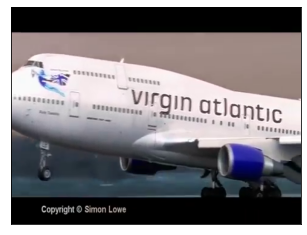

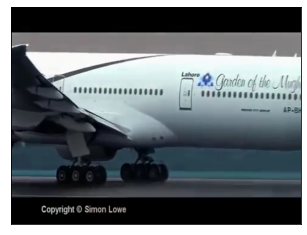

In [20]:
frame = cv2.imread('dataset/frames/3870.png')
plt.imshow(frame)
plt.xticks([]);plt.yticks([])
plt.show()

frame = cv2.imread('dataset/frames/5910.png')
plt.imshow(frame)
plt.xticks([]);plt.yticks([])
plt.show()

Alterando a quantidade de cluster para k=64 e retitir o procedimento acima, comparando os resultados de calculo de distancia. O que mudou em relação as distâncias calculadas ?

Buscando uma imagem similar desconhecida

In [23]:
search_dir = 'imagens/'
q = search_dir + 'beluga.png'
q_feature = q + '.brief'
q_bow = q_feature + '.bow'

In [24]:
img_search = cv2.imread(q)

star = cv2.xfeatures2d.StarDetector_create()

brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

kp = star.detect(img_search, None)

kp,  feat = brief.compute(img_search, kp)

print(len(kp))
print(np.shape(feat))

with open(q_feature, 'wb') as f:
    pickle.dump(feat.tolist(), f)

759
(759, 32)


In [25]:
centroids = np.loadtxt(cluster_file)

cluters = centroids.shape[0]

with open(q_feature, 'rb') as f:
    feat = pickle.load(f)

    blow = [0] * clusters

    for item in feat:
        result = sys.float_info.max
        centroid_id = 0

        for id, c in enumerate(centroids):
            dist = np.sqrt(np.sum(np.square(np.subtract(item, c))))
            if dist < result:
                result = dist
                centroid_id = id

        bow[centroid_id] += 1

    with open(q_bow, 'w') as f:
        for item in bow:
            f.write('%s ' % item)

print('done')

done


Buscando os similares

In [26]:
q = np.loadtxt(q_bow)
only_files = []

if path.exists(bow_dir):
    only_files = [f for f in listdir(bow_dir) if isfile(join(bow_dir, f))]

In [31]:
similarity = []

for file in only_files:
    feat_path = join(bow_dir, file)

    item = np.loadtxt(feat_path)
    dist = np.sqrt(np.sum(np.square(np.subtract(item, q))))

    similarity.append(dict(file=file, dist=dist))

f = operator.itemgetter('dist')
similarity.sort(key=f)
similarity[0:10]

[{'file': '1500.png.brief.bow', 'dist': 98.27512401416749},
 {'file': '3870.png.brief.bow', 'dist': 99.6393496566492},
 {'file': '3900.png.brief.bow', 'dist': 99.65440281292142},
 {'file': '1590.png.brief.bow', 'dist': 100.61312041677269},
 {'file': '4740.png.brief.bow', 'dist': 101.16817681464859},
 {'file': '5850.png.brief.bow', 'dist': 101.17806086301516},
 {'file': '4020.png.brief.bow', 'dist': 101.33607452432722},
 {'file': '5910.png.brief.bow', 'dist': 101.67103815738285},
 {'file': '3840.png.brief.bow', 'dist': 101.72511980823616},
 {'file': '600.png.brief.bow', 'dist': 101.94115949899727}]

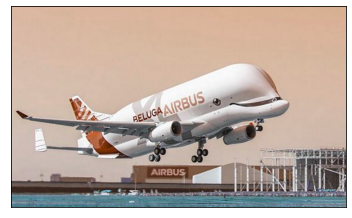

In [33]:
plt.imshow(img_search)
plt.xticks([]);plt.yticks([])
plt.show()

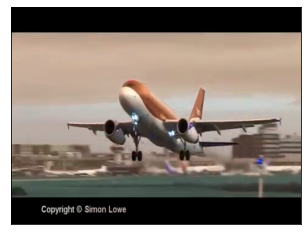

In [36]:
result_1 = cv2.imread('dataset/frames/1500.png')
plt.imshow(result_1)
plt.xticks([]);plt.yticks([])
plt.show()